In [1]:
import pandas as pd
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [2]:

basepath = Path(os.getcwd())
# make sure your working directory is the repository root.
if basepath.name != "tum-adlr-ws21-04":
    os.chdir(basepath.parent.parent)
    
basepath = Path(os.getcwd())

In [3]:
task_name = "AntS-v1"
graph_logs_dir = basepath / "graph_logs"
graph_logs_dir.exists(), graph_logs_dir

(True, WindowsPath('C:/Users/tsbau/git/tum-adlr-ws21-04/graph_logs'))

In [4]:
with open(str(graph_logs_dir / f"{task_name}.json")) as json_file:
    task_log = json.load(json_file)
    
task_log.keys()

dict_keys(['tree', 'relation_matrix', 'node_type_dict', 'output_type_dict', 'input_dict', 'output_list', 'debug_info', 'node_parameters', 'para_size_dict', 'num_nodes'])

In [5]:
task_log["node_type_dict"]

{'root': [0],
 'joint': [1, 2, 3, 4, 5, 6, 7, 8],
 'body': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]}

In [6]:
task_log["output_type_dict"]

{'hip': [7, 1, 3, 5], 'ankle': [8, 2, 4, 6]}

In [7]:
task_log["input_dict"]

{'0': [20, 21, 22, 23, 24, 25],
 '1': [-2, 6],
 '2': [-1, 7],
 '3': [0, 8],
 '4': [1, 9],
 '5': [2, 10],
 '6': [3, 11],
 '7': [4, 12],
 '8': [5, 13],
 '9': [20, 21, 22, 23, 24, 25],
 '10': [26, 27, 28, 29, 30, 31],
 '11': [32, 33, 34, 35, 36, 37],
 '12': [38, 39, 40, 41, 42, 43],
 '13': [44, 45, 46, 47, 48, 49],
 '14': [50, 51, 52, 53, 54, 55],
 '15': [56, 57, 58, 59, 60, 61],
 '16': [62, 63, 64, 65, 66, 67],
 '17': [68, 69, 70, 71, 72, 73],
 '18': [74, 75, 76, 77, 78, 79],
 '19': [80, 81, 82, 83, 84, 85],
 '20': [86, 87, 88, 89, 90, 91],
 '21': [92, 93, 94, 95, 96, 97]}

In [8]:
task_log["num_nodes"]

22

In [9]:
task_log["relation_matrix"]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0, 10, 0, 0, 10, 0, 0, 10, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0],
 [-10, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, -6, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [-10, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, -6, 0, 0, 0, 

In [10]:
edge_colors = {
    10:"blue", # root-body
    3:"green", # body-body
    6:"blue", # joint-body
}
node_colors = {
    "red": task_log["node_type_dict"]["root"],
    "blue": task_log["node_type_dict"]["joint"],
    "black": task_log["node_type_dict"]["body"],
}

node_names = {node["id"]: node["raw_name"] for node in task_log["tree"] if "raw_name" in node.keys()}
node_names[0] = "root"
node_names, node_colors

({1: 'hip_1',
  2: 'ankle_1',
  3: 'hip_2',
  4: 'ankle_2',
  5: 'hip_3',
  6: 'ankle_3',
  7: 'hip_4',
  8: 'ankle_4',
  9: 'torso',
  10: 'front_left_leg',
  11: 'aux_1',
  12: 'front_left_foot',
  13: 'front_right_leg',
  14: 'aux_2',
  15: 'front_right_foot',
  16: 'left_back_leg',
  17: 'aux_3',
  18: 'left_back_foot',
  19: 'right_back_leg',
  20: 'aux_4',
  21: 'right_back_foot',
  0: 'root'},
 {'red': [0],
  'blue': [1, 2, 3, 4, 5, 6, 7, 8],
  'black': [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]})

In [11]:
G = nx.Graph()

for i in range(task_log["num_nodes"]):
    G.add_node(i)
    for j in range(i, task_log["num_nodes"]):
        if task_log["relation_matrix"][i][j] != 0:
            G.add_edge(i, j)#, color= edge_colors[task_log["relation_matrix"][i][j]])

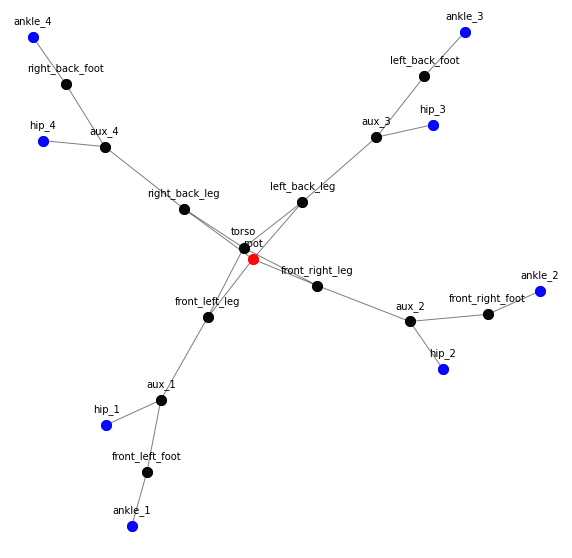

In [21]:

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, pos={0: np.array([ 0, 0])})

options = {"node_size": 100, "alpha": 0.8}
for color, nodes in node_colors.items():
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)
    nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)

    
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

for p in pos:  # raise text positions
    pos[p][1] += 0.055
nx.draw_networkx_labels(G, pos, node_names, font_size=10)
    
plt.axis("off")
plt.show()